# Criando nomes 

In [1]:
import pandas as pd

In [2]:
# https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f
nomes_fem = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_masc = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [3]:
print('Qtd de nomes: {}'.format(str(len(nomes_masc) + len(nomes_fem))))

Qtd de nomes: 400


In [4]:
frame = [nomes_fem, nomes_masc]

In [5]:
frame

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [6]:
pd.concat(frame)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [7]:
pd.concat(frame)['nome'].head(20)

0         MARIA
1           ANA
2     FRANCISCA
3       ANTONIA
4       ADRIANA
5       JULIANA
6        MARCIA
7      FERNANDA
8      PATRICIA
9         ALINE
10       SANDRA
11       CAMILA
12       AMANDA
13        BRUNA
14      JESSICA
15      LETICIA
16        JULIA
17      LUCIANA
18      VANESSA
19      MARIANA
Name: nome, dtype: object

In [8]:
nomes = pd.concat(frame)['nome'].to_frame()

In [9]:
nomes.sample(10)

,nome
82,SOLANGE
45,ADRIANO
196,ARLINDO
81,LUAN
194,CLARA
55,FLAVIO
157,JAIME
153,CAUA
43,THIAGO
165,EUNICE


# Incluindo ID dos alunos

In [10]:
import numpy as np

In [11]:
np.random.seed(123)

In [12]:
total_alunos = len(nomes)

In [13]:
total_alunos

400

In [14]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [15]:
nomes.sample(10)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111
84,SEVERINO,78
104,EVA,13
36,ROBERTO,364
4,ADRIANA,343
67,HENRIQUE,64


# Criando email

In [16]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']

In [17]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [18]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominioemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominioemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominioemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominioemail.com.br
198,ALVARO,383,@dominioemail.com.br


In [19]:
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

In [20]:
nomes.sample(10)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominioemail.com.br,severino@dominioemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominioemail.com.br,iago@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br,sandra@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br,teresinha@dominioemail.com.br
18,VANESSA,42,@dominioemail.com.br,vanessa@dominioemail.com.br
36,DEBORA,338,@dominioemail.com.br,debora@dominioemail.com.br
190,NATANAEL,58,@servicodoemail.com,natanael@servicodoemail.com
174,CLEONICE,90,@servicodoemail.com,cleonice@servicodoemail.com
123,EVANDRO,52,@dominioemail.com.br,evandro@dominioemail.com.br


# Criando a tabela cursos

In [21]:
# http://tabela-cursos.herokuapp.com/index.html

In [27]:
# para instalação inicial
# para instalar no codelab do Google, usar o !pip3 install <pacote>
# conda install html5lib
# conda install lxml

In [24]:
 import html5lib as html

In [25]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [26]:
pd.read_html(url)

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [29]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [31]:
type(cursos)

list

In [32]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [33]:
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

# Alterando o index de cursos

In [34]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [35]:
cursos['id'] = cursos.index + 1

In [36]:
cursos.head()

,Nome do curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [37]:
cursos = cursos.set_index('id')
cursos

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matricula dos alunos

In [40]:
nomes['matriculas'] = np.random.exponential(size=total_alunos).astype(int)

In [41]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,0
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,0
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,0
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,2
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,0
...,...,...,...,...,...
195,WALTER,231,@dominioemail.com.br,walter@dominioemail.com.br,0
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,0
198,ALVARO,383,@dominioemail.com.br,alvaro@dominioemail.com.br,1


In [42]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,3
...,...,...,...,...,...
195,WALTER,231,@dominioemail.com.br,walter@dominioemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,5
198,ALVARO,383,@dominioemail.com.br,alvaro@dominioemail.com.br,5


In [43]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,2
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominioemail.com.br,walter@dominioemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,2
197,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,1
198,ALVARO,383,@dominioemail.com.br,alvaro@dominioemail.com.br,3


In [44]:
nomes.matriculas.describe()

count    400.000000
mean       2.090000
std        1.500844
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [45]:
import seaborn as sns

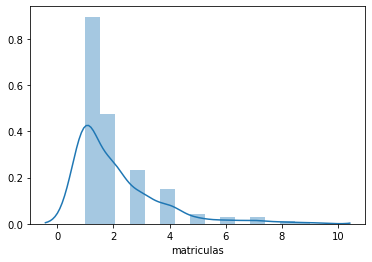

In [46]:
sns.distplot(nomes.matriculas)

In [48]:
nomes.matriculas.value_counts()

1    191
2    101
3     50
4     32
5      9
7      6
6      6
8      3
9      2
Name: matriculas, dtype: int64

# Selecionando os cursos

In [49]:
todas_matriculas = []
random_numero_cursos = np.random.rand(20)
probabilidade = random_numero_cursos / sum(random_numero_cursos)

In [50]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,2
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominioemail.com.br,walter@dominioemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,2
197,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,1
198,ALVARO,383,@dominioemail.com.br,alvaro@dominioemail.com.br,3


In [52]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = probabilidade)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns={'id_aluno', 'id_curso'})

In [53]:
matriculas

,id_aluno,id_curso
0,235,12
1,43,10
2,304,1
3,304,12
4,156,10
...,...,...
831,323,14
832,383,1
833,383,14
834,383,14


In [54]:
nomes.head(2)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1


In [55]:
matriculas.head(2)

,id_aluno,id_curso
0,235,12
1,43,10


In [56]:
cursos.head(2)

,Nome do curso
id,
1,Lógica de programação
2,Java para Web


In [58]:
matriculas.groupby('id_curso').count().join(cursos['Nome do curso'])

,id_aluno,Nome do curso
id_curso,,
1,36,Lógica de programação
2,41,Java para Web
3,9,C# para Web
4,68,Ruby on Rails
5,20,Cursos de Python
6,4,PHP com MySql
7,21,.NET para web
8,13,Novas integrações com Java
9,71,TDD com Java


In [59]:
matriculas.groupby('id_curso').count().join(cursos['Nome do curso']).rename(columns = {'id_aluno': 'quantidade de alunos'})

,quantidade de alunos,Nome do curso
id_curso,,
1,36,Lógica de programação
2,41,Java para Web
3,9,C# para Web
4,68,Ruby on Rails
5,20,Cursos de Python
6,4,PHP com MySql
7,21,.NET para web
8,13,Novas integrações com Java
9,71,TDD com Java


In [60]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome do curso']).rename(columns = {'id_aluno': 'quantidade de alunos'})

In [61]:
matriculas_por_curso

,quantidade de alunos,Nome do curso
id_curso,,
1,36,Lógica de programação
2,41,Java para Web
3,9,C# para Web
4,68,Ruby on Rails
5,20,Cursos de Python
6,4,PHP com MySql
7,21,.NET para web
8,13,Novas integrações com Java
9,71,TDD com Java


In [63]:
matriculas_por_curso.to_csv('dados/matriculas_por_curso.csv', index = False)

In [64]:
pd.read_csv('dados/matriculas_por_curso.csv')

,quantidade de alunos,Nome do curso
0,36,Lógica de programação
1,41,Java para Web
2,9,C# para Web
3,68,Ruby on Rails
4,20,Cursos de Python
5,4,PHP com MySql
6,21,.NET para web
7,13,Novas integrações com Java
8,71,TDD com Java
9,80,Código limpo com C#


In [65]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade de alunos":{"1":36,"2":41,"3":9,"4":68,"5":20,"6":4,"7":21,"8":13,"9":71,"10":80,"11":12,"12":46,"13":47,"14":75,"15":29,"16":10,"17":41,"18":99,"19":96,"20":18},"Nome do curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [66]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade de alunos</th>\n      <th>Nome do curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>36</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>41</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>9</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>68</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>20</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>4</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>21</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>13</td>\n      <td>Novas integrações com Java</td>\n  

In [67]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade de alunos</th>
      <th>Nome do curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>36</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>41</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>9</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>68</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>20</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>21</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>13</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>71</td>
  

# Criando Banco SQL

In [68]:
# conda install sqlalchemy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Rossini\anaconda3

  added / updated specs:
    - sqlalchemy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sqlalchemy-1.3.19          |   py38he774522_0         1.5 MB
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following packages will be UPDATED:

  sqlalchemy                          1.3.18-py38he774522_0 --> 1.3.19-py38he774522_0




sqlalchemy-1.3.19    | 1.5 MB    |            |   0% 
sqlalchemy-1.3.19    | 1.5 MB    | 1          |   1% 
sqlalchemy-1.3.19    | 1.5 MB    | #1         |  12% 
sqlalchemy-1.3.19    | 1.5 MB    | ##8        |  29% 
sqlalchemy-1.3.19    | 1.5 MB    | ####2      |  42% 
sqlalchemy-1.3.19    | 1.5 MB    | ######1    |  61% 
sqlalchemy-1.3.19    | 1.5 MB    | #######8   | 

In [69]:
from sqlalchemy import create_engine, MetaData, Table

In [70]:
engine = create_engine('sqlite:///:memory:')

In [71]:
engine

Engine(sqlite:///:memory:)

In [72]:
type(engine)

sqlalchemy.engine.base.Engine

In [73]:
matriculas_por_curso.head()

,quantidade de alunos,Nome do curso
id_curso,,
1,36,Lógica de programação
2,41,Java para Web
3,9,C# para Web
4,68,Ruby on Rails
5,20,Cursos de Python


In [74]:
matriculas_por_curso.to_sql('matriculas', engine)

In [76]:
print(engine.table_names())

['matriculas']


# Buscando no banco SQL

In [79]:
query = 'select * from matriculas where "quantidade de alunos" < 20 '

In [80]:
pd.read_sql(query, engine)

,id_curso,quantidade de alunos,Nome do curso
0,3,9,C# para Web
1,6,4,PHP com MySql
2,8,13,Novas integrações com Java
3,11,12,Preparatório para certificação Java
4,16,10,Estatística básica
5,20,18,Orientação objetos com Java


In [81]:
pd.read_sql_table('matriculas', engine, columns = ['Nome do curso', 'quantidade de alunos'])

,Nome do curso,quantidade de alunos
0,Lógica de programação,36
1,Java para Web,41
2,C# para Web,9
3,Ruby on Rails,68
4,Cursos de Python,20
5,PHP com MySql,4
6,.NET para web,21
7,Novas integrações com Java,13
8,TDD com Java,71
9,Código limpo com C#,80


In [82]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['Nome do curso', 'quantidade de alunos'])

In [88]:
type(muitas_matriculas)

pandas.core.frame.DataFrame

In [89]:
muitas_matriculas.rename(columns = {'Nome do curso': 'nome_do_curso', 'quantidade de alunos': 'quantidade_de_alunos'}, inplace=True)
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,36
1,Java para Web,41
2,C# para Web,9
3,Ruby on Rails,68
4,Cursos de Python,20
5,PHP com MySql,4
6,.NET para web,21
7,Novas integrações com Java,13
8,TDD com Java,71
9,Código limpo com C#,80


In [91]:
muitas_matriculas.query('quantidade_de_alunos > 80')

,nome_do_curso,quantidade_de_alunos
17,Programação funcional,99
18,Boas práticas em Java,96


# Escrevendo no banco 

In [92]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [93]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos da próxima turma

In [95]:
matriculas_por_curso.head(20)

,quantidade de alunos,Nome do curso
id_curso,,
1,36,Lógica de programação
2,41,Java para Web
3,9,C# para Web
4,68,Ruby on Rails
5,20,Cursos de Python
6,4,PHP com MySql
7,21,.NET para web
8,13,Novas integrações com Java
9,71,TDD com Java


In [96]:
id_curso = 12

In [97]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,10
2,304,1
3,304,12
4,156,10


In [99]:
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
0,235,12
3,304,12
18,217,12
56,172,12
68,76,12
114,193,12
116,193,12
119,83,12
124,32,12
148,212,12


In [100]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,maria@dominioemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,2
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [101]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
17,12,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,7
17,12,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,7
32,12,SARA,@dominioemail.com.br,sara@dominioemail.com.br,6
36,12,KARINA,@dominioemail.com.br,karina@dominioemail.com.br,3
66,12,LUAN,@dominioemail.com.br,luan@dominioemail.com.br,2
76,12,JAQUELINE,@servicodoemail.com,jaqueline@servicodoemail.com,4
81,12,INGRID,@dominioemail.com.br,ingrid@dominioemail.com.br,5
83,12,ISABEL,@dominioemail.com.br,isabel@dominioemail.com.br,1
86,12,GUSTAVO,@servicodoemail.com,gustavo@servicodoemail.com,4


In [102]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
17        WILLIAN
17        WILLIAN
32           SARA
36         KARINA
66           LUAN
76      JAQUELINE
81         INGRID
83         ISABEL
86        GUSTAVO
97          ELTON
105        MARISA
111      ANDERSON
134        GILSON
141         PABLO
144       CECILIA
164         MARIO
172        ELIANE
175       ROGERIO
177        ISAIAS
193    ALESSANDRA
193    ALESSANDRA
201       BARBARA
204       CLAUDIO
208          LUIZ
210         JULIO
212         PAULA
217        AMANDA
235         MARIA
239        MIGUEL
250    ELIZANGELA
252      GILBERTO
253       MICHELE
257       ADILSON
282       MARILIA
286        RAISSA
304     FRANCISCA
313       EDVALDO
332     APARECIDO
334        JANETE
335      DENILSON
371        MILENA
374       JULIANO
377       VALERIA
394        JOELMA
395      MAURICIO
399        CICERA
Name: nome, dtype: object

In [103]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
17,WILLIAN
17,WILLIAN
32,SARA
36,KARINA
66,LUAN
76,JAQUELINE
81,INGRID
83,ISABEL
86,GUSTAVO


In [107]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome do curso    Hardware básico
Name: 12, dtype: object

In [108]:
nome_curso = nome_curso['Nome do curso']
nome_curso

'Hardware básico'

In [109]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
17,WILLIAN
17,WILLIAN
32,SARA
36,KARINA
66,LUAN
76,JAQUELINE
81,INGRID
83,ISABEL
86,GUSTAVO


In [110]:
proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)}, inplace = True)

In [111]:
proxima_turma

,Alunos do curso de Hardware básico
id_aluno,
17,WILLIAN
17,WILLIAN
32,SARA
36,KARINA
66,LUAN
76,JAQUELINE
81,INGRID
83,ISABEL
86,GUSTAVO


# Exportar para excel

In [112]:
proxima_turma.to_excel('dados/proxima_turma.xlsx', index = False)

In [113]:
read_proxima_turma = pd.read_excel('dados/proxima_turma.xlsx')

In [114]:
read_proxima_turma

,Alunos do curso de Hardware básico
0,WILLIAN
1,WILLIAN
2,SARA
3,KARINA
4,LUAN
5,JAQUELINE
6,INGRID
7,ISABEL
8,GUSTAVO
9,ELTON
